Ready for Dispersion!
done


/tmp/ipykernel_303872/572692025.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(df.sort_values(['x'])[df['y'] == 1].x,df.sort_values(['x'])[df['y'] == 1].concentration)


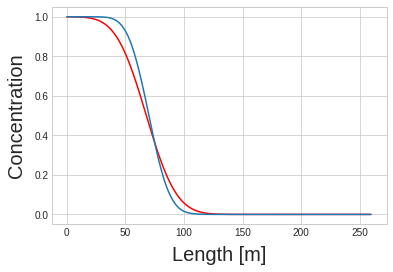

In [13]:
import numpy as np
from scipy import special as sp
from scipy import optimize
import math
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')

print("Ready for Dispersion!")

def solute_pulse():
    Seconds = 170
    
    n = 260
    D = 1.3 #Dispersion Coefficient
    v = 0.153/0.4 # Average linear groundwater velocity
    Cnot = 1 #initial solute concentration
    L = np.zeros(n)
    conc = np.zeros(n,dtype=float)
    sqrtPi = np.sqrt(np.pi)
    for i in range(n):
        L[i] = i
    
    conc[0] = 1
    for t in range(1, Seconds):
        for i in range(1, n):
            a = sp.erfc((L[i] - (v * t)) / (2* (np.sqrt(D * t))))
            b = np.exp((v * L[i]) / (D)) * sp.erfc((L[i] + (v * t)) / (2 * (np.sqrt(D * t))))
            conc[i]= (1/2) * (a + b)
    return L, conc

def main():
    df = pd.read_csv('concentration.csv')
    
    
    L,conc = solute_pulse()
    plt.ion()
    plt.clf()
    plt.ylabel('Concentration', fontsize=20, labelpad=8)
    plt.xlabel('Length [m]',fontsize=20, labelpad=8)
#     plt.xlim(0, 2)
    plt.plot(L,conc, c='red')
    plt.plot(df.sort_values(['x'])[df['y'] == 1].x,df.sort_values(['x'])[df['y'] == 1].concentration)
    plt.draw()
    plt.ioff()
    plt.show
main()
print("done")